In [1]:
"""
This notebook aggregates all output from toboggan and catfish
for a specified input dataset, then creates runtime histograms
"""
import table_generator
import matplotlib.pyplot as plt
import numpy as np

    
show_flag = False

time_totals = []
time_totals_catfish_nontrivials = []
time_totals_catfish_tob_timeouts = []

froots = ['human', 'mouse', 'zebra']

for froot in ['human', 'mouse', 'zebra']:
    #froot = 'mouse'

    timeoutexceed = 800
    which_alg = "toboggan"

    inputfile = "all-" + froot + ".txt"

    # import table_generator

    # datadict, datamatrix, dict_cat_to_tob, dict_tob_to_cat = table_generator.make_tables(inputfile)
    datadict, datamatrix = table_generator.make_tables(inputfile)

    info_dict = table_generator.get_toboggan_timing_info(datadict, datamatrix)
    num_trivial = info_dict['num_trivial']
    num_timedout = info_dict['num_timedout']
    time_totals.append(info_dict['time_totals'])
    total_num = info_dict['total_num']
    nontrivials_dict = info_dict['nontrivials_dict']
    toboggan_completed = info_dict['toboggan_completed']
    toboggan_timeouts = info_dict['toboggan_timeouts']
    toboggan_num_paths_dict = info_dict['toboggan_num_paths_dict']

    table_generator.print_data_summary( froot, len(datadict), num_trivial )
    table_generator.print_alg_summary( which_alg, timeoutexceed, num_timedout, len(time_totals) )

    print(num_timedout + len(time_totals))

    catinputfile = 'catfish-' + froot + '-proper-output.txt'
    catfish_dict, catfish_matrix = table_generator.get_catfish_tables( '../catfish-comparison/', catinputfile)

    # interesect catfish keys with nontrivial keys
    nontrivial_catfish = catfish_dict.copy()
    for key in catfish_dict:
        if key not in toboggan_completed:
            nontrivial_catfish.pop(key, None)
    catfish_nontrivials_info_dict = table_generator.get_catfish_timing_info(nontrivial_catfish, catfish_matrix)
    time_totals_catfish_nontrivials.append(catfish_nontrivials_info_dict['time_totals'])

    catfish_on_tob_timeouts = {}
    for key, val in catfish_dict.items():
        if key in toboggan_timeouts:
            catfish_on_tob_timeouts[key] = val
    catfish_tob_timeout_info_dict = table_generator.get_catfish_timing_info(catfish_on_tob_timeouts, catfish_matrix)
    time_totals_catfish_tob_timeouts.append(catfish_tob_timeout_info_dict['time_totals'])

human has 
	total   instances:      1169083
	trivial instances:       639560
	nontriv instances:       529523

toboggan with 800s timeout has
	timeout instances:            0
	success instances:            1
1
mouse has 
	total   instances:      1316058
	trivial instances:       842873
	nontriv instances:       473185

toboggan with 800s timeout has
	timeout instances:            0
	success instances:            2
2
zebra has 
	total   instances:      1549373
	trivial instances:      1103493
	nontriv instances:       445880

toboggan with 800s timeout has
	timeout instances:            0
	success instances:            3
3


In [2]:
catfish_sum = 0
toboggan_sum = 0
toboggan_long_sum = 0
for j in [0,1,2]:
    print(sum(time_totals_catfish_nontrivials[j]))
    catfish_sum += sum(time_totals_catfish_nontrivials[j])
    toboggan_sum += sum(time_totals[j])
    long_times = [ x for x in time_totals[j] if x > 0.5]
    toboggan_long_sum += sum(long_times)
    print(len(long_times))
print("catfish total: {}".format(catfish_sum))
print("toboggan total: {}".format(toboggan_sum))
print("toboggan total over 2s: {}".format(toboggan_long_sum))
print("toboggan minus long {}".format(toboggan_sum - toboggan_long_sum))



1825.1296191215515
7269
1680.2260267734528
6570
1626.945827960968
939
catfish total: 5132.301473855972
toboggan total: 533579.4521188214
toboggan total over 2s: 528051.9334192248
toboggan minus long 5527.518699596636


In [3]:
# Determine percent of runs where toboggan is under 0.005,
# and percent where it didn't terminate in 50s or less

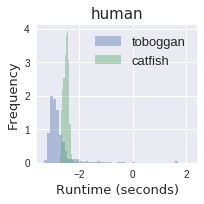

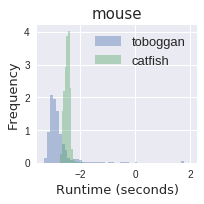

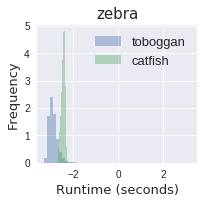

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

froots = ['human', 'mouse', 'zebra']
show_flag = True

hist_flag = True
kde_flag = False
norm_hist_flag=True

for j in [0,1,2]:

    froot = froots[j]

    plt.clf()
    plt.figure(figsize=(3,3))

    axis_font = {'fontname':'DejaVu Sans', 'size':'13'}
    title_font = {'fontname':'DejaVu Sans', 'size':'15'}
    xtick_font = {'fontname':'DejaVu Sans', 'size':'15'}
    ytick_font = {'fontname':'DejaVu Sans', 'size':'15'}

    data=np.log10(time_totals[j])
    sns.distplot(data, kde=kde_flag, hist=hist_flag, norm_hist=norm_hist_flag, label="toboggan")
    data=np.log10(time_totals_catfish_nontrivials[j])
    sns.distplot(data, kde=kde_flag, hist=hist_flag, norm_hist=norm_hist_flag, label="catfish")
    # data=np.log10(time_totals_catfish_tob_timeouts[j])
    # sns.distplot(data, kde=True, hist=False, label="TOs", ax=ax)

    plt.title(froots[j], **title_font)
    plt.legend(loc='upper right', fontsize=axis_font['size'])
    #plt.gca().set_xticklabels([10**x for x in range(-4, 4)])
    plt.xlabel("Runtime (seconds)", **axis_font)
    plt.ylabel("Frequency", **axis_font)
    

    fig = plt.gcf()
    fig.tight_layout()

    if show_flag == True:
        plt.show()
    else:
        plt.savefig( './figures/'+'runtime-kdensity-' + froot + '.pdf', format='pdf', dpi=300)
        plt.savefig( './figures/'+'runtime-kdensity-' + froot + '.png', format='png', dpi=300)
    plt.close()


In [5]:
# AGGREGATE ALL IN ONE

all_toboggan_times = []
all_catfish_times = []
for j in [0,1,2]:
    all_toboggan_times.extend(time_totals[j])
    all_catfish_times.extend(time_totals_catfish_nontrivials[j])

all_toboggan_times_small = [ x for x in all_toboggan_times if x <= 0.01 ]
all_toboggan_times_big = [ x for x in all_toboggan_times if x > 0.01 ]
all_catfish_times_small = [ x for x in all_catfish_times if x <= 0.01 ]
all_catfish_times_big = [ x for x in all_catfish_times if x > 0.01 ]

all_toboggan_times_altered = all_toboggan_times_small.copy()
all_toboggan_times_altered.extend([ 10**-2 + 10**-5 for x in all_toboggan_times_big ])

all_catfish_times_altered = all_catfish_times_small.copy()
all_catfish_times_altered.extend([ 10**-2 + 10**-5 for x in all_catfish_times_big ])


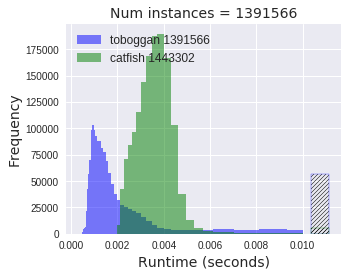

In [6]:
# AGGREGATE HIST WITH SINGLE BIN FOR LARGE RUNTIMES

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

show_flag = True


plt.clf()
plt.figure(figsize=(5,4))

logbins = [ 10**x for x in np.linspace(-3.5, -2.0, num=50) ]
#logbins.append( 10**-2 + (3/4)*10**-3 )
extratag = ''
log_scale_flag = False

if log_scale_flag:
    plt.gca().set_yticklabels([10**x for x in range(0, 6)], **ytick_font)
    plt.gca().set_yscale("log")    

    
data1 = all_toboggan_times_small
data2 = all_catfish_times_small
n, bins, patchs = plt.hist(data1, bins=logbins, log=log_scale_flag, alpha=0.5, color='blue', label='toboggan {}'.format(len(data1)))
n, bins, patchs = plt.hist(data2, bins=logbins, log=log_scale_flag, alpha=0.5, color='green', label='catfish {}'.format(len(data2)))

data3 = [ 10**-2 + 10**-5 for x in all_toboggan_times_big ]
data4 = [ 10**-2 + 10**-5 for x in all_catfish_times_big ]
# n, bins, patchs = plt.hist(data3, bins=logbins, log=log_scale_flag, edgecolor='black', hatch="////" )
# n, bins, patchs = plt.hist(data4, bins=logbins, log=log_scale_flag, hatch="///" )
# 10**-2 + (3/4)*10**-3
# mpl.rcParams['hatch.color'] = 'white'
mpl.rcParams['hatch.linewidth'] = 0.5
plt.bar( 10**-2 + (3/4)*10**-3, len(data3), color='none', width=(3/4)*10**-3 , edgecolor='blue', hatch='//////')
plt.bar( 10**-2 + (3/4)*10**-3, len(data4), color='none', width=(3/4)*10**-3 , edgecolor='green', hatch='//////')




legend_font = {'fontname':'DejaVu Sans', 'size':'12'}
axis_font = {'fontname':'DejaVu Sans', 'size':'14'}
title_font = {'fontname':'DejaVu Sans', 'size':'14'}
xtick_font = {'fontname':'DejaVu Sans', 'size':'14'}
ytick_font = {'fontname':'DejaVu Sans', 'size':'14'}

# if froot == 'human':
plt.ylabel("Frequency", **axis_font)
plt.legend(loc='upper left', frameon=False, fontsize=legend_font['size'])
# else:
#     plt.gca().set_yticklabels([])

#plt.xlim([10**-4, 10**4])
#plt.ylim([10**0, 10**6])
# plt.gca().set_xticklabels([10**x for x in range(-4, 3)], **xtick_font)
# plt.gca().set_xscale("log")

plt.title('Num instances = {}'.format(len(data1)), **title_font)
plt.xlabel("Runtime (seconds)", **axis_font)
plt.ylabel("Frequency", **axis_font)

fig = plt.gcf()
fig.tight_layout()

if show_flag == True:
    plt.show()
else:
    plt.savefig( './figures/'+'runtime-aggregate' + '.pdf', format='pdf', dpi=300)
    plt.savefig( './figures/'+'runtime-aggregate' + '.png', format='png', dpi=300)
plt.close()

In [20]:
import numpy as np

prctile = 5
p = np.percentile(all_toboggan_times, prctile) 
print("toboggan, {}%    is  {:10.5f}". format( prctile, p) )

p = np.percentile(all_catfish_times, prctile) 
print("catfish,  {}%    is  {:10.5f}". format( prctile, p) )


prctile = 50
p = np.percentile(all_toboggan_times, prctile) 
print("toboggan, {}%  is  {:10.5f}". format( prctile, p) )

p = np.percentile(all_catfish_times, prctile) 
print("catfish,  {}%  is  {:10.5f}". format( prctile, p) )


prctile = 80
p = np.percentile(all_toboggan_times, prctile) 
print("toboggan, {}%  is  {:10.5f}". format( prctile, p) )

p = np.percentile(all_catfish_times, prctile) 
print("catfish,  {}%  is  {:10.5f}". format( prctile, p) )


prctile = 90
p = np.percentile(all_toboggan_times, prctile) 
print("toboggan, {}%   is  {:10.5f}". format( prctile, p) )

p = np.percentile(all_catfish_times, prctile) 
print("catfish,  {}%   is  {:10.5f}". format( prctile, p) )

prctile = 95
p = np.percentile(all_toboggan_times, prctile) 
print("toboggan, {}%   is  {:10.5f}". format( prctile, p) )

p = np.percentile(all_catfish_times, prctile) 
print("catfish,  {}%   is  {:10.5f}". format( prctile, p) )


prctile = 99
p = np.percentile(all_toboggan_times, prctile) 
print("toboggan, {}%   is  {:10.5f}". format( prctile, p) )

p = np.percentile(all_catfish_times, prctile) 
print("catfish,  {}%   is  {:10.5f}". format( prctile, p) )

print("catfish, max    is  {:10.5f}". format( max(all_catfish_times)) )
print("catfish, min    is  {:10.5f}". format( min(all_catfish_times)) )

toboggan, 5%    is     0.00072
catfish,  5%    is     0.00233
toboggan, 50%  is     0.00124
catfish,  50%  is     0.00347
toboggan, 80%  is     0.00202
catfish,  80%  is     0.00408
toboggan, 90%   is     0.00308
catfish,  90%   is     0.00436
toboggan, 95%   is     0.00758
catfish,  95%   is     0.00460
toboggan, 99%   is     0.52795
catfish,  99%   is     0.00570
catfish, max    is     1.21449
catfish, min    is     0.00190


In [24]:

for prctile in list(np.linspace(99,99.9, num=20)):
    p = np.percentile(all_toboggan_times, prctile) 
    print("toboggan, {}%   is  {:10.5f}". format( prctile, p) )

toboggan, 99.0%   is     0.52795
toboggan, 99.04736842105264%   is     0.67439
toboggan, 99.09473684210526%   is     0.90997
toboggan, 99.1421052631579%   is     1.00984
toboggan, 99.18947368421053%   is     1.19765
toboggan, 99.23684210526316%   is     1.66040
toboggan, 99.28421052631579%   is     2.84301
toboggan, 99.33157894736843%   is     3.65060
toboggan, 99.37894736842105%   is     4.49979
toboggan, 99.42631578947369%   is     6.47012
toboggan, 99.47368421052632%   is     9.53674
toboggan, 99.52105263157895%   is    13.73602
toboggan, 99.56842105263158%   is    32.56106
toboggan, 99.61578947368422%   is    50.00000
toboggan, 99.66315789473684%   is    50.00000
toboggan, 99.71052631578948%   is    50.00000
toboggan, 99.7578947368421%   is    50.00000
toboggan, 99.80526315789474%   is    50.00000
toboggan, 99.85263157894737%   is    50.00000
toboggan, 99.9%   is    50.00000


In [260]:
# AGGREGATE HIST WITH SINGLE BIN FOR LARGE RUNTIMES
# NON LOG SCALE

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import numpy as np
import seaborn as sns

show_flag = False


plt.clf()
plt.figure(figsize=(5,4))

logbins = np.linspace( 10**-3.5, 10**-2, num=50 )
#logbins = [ 10**x for x in np.linspace(-3.5, -2.0, num=50) ]
#logbins.append( 10**-2 + (3/4)*10**-3 )
extratag = ''
log_scale_flag = False

if log_scale_flag:
    plt.gca().set_yticklabels([10**x for x in range(0, 6)], **ytick_font)
    plt.gca().set_yscale("log")    

cm = plt.get_cmap('Paired') 
    
# color_toboggan = cm.colors[0]
# color_catfish = cm.colors[3]

color_toboggan =  tuple( x/256 for x in [212,170,0] ) # cm.colors[0]
color_catfish = tuple( x/256 for x in [0.0,160.0,212.0] ) # cm.colors[3]

data1 = all_toboggan_times_small
data2 = all_catfish_times_small
n, bins, patchs = plt.hist(data1, bins=logbins, log=log_scale_flag, alpha=0.5, color=color_toboggan, label='toboggan' )
n, bins, patchs = plt.hist(data2, bins=logbins, log=log_scale_flag, alpha=0.5, color=color_catfish, label='catfish' )
n, bins, patchs = plt.hist(data1, bins=logbins, log=log_scale_flag, histtype='step', alpha=0.5, color='black', linewidth=0.5)
n, bins, patchs = plt.hist(data2, bins=logbins, log=log_scale_flag, histtype='step', alpha=0.5, color='black', linewidth=0.5)



data3 = [ 10**-2 + 10**-5 for x in all_toboggan_times_big ]
data4 = [ 10**-2 + 10**-5 for x in all_catfish_times_big ]
# n, bins, patchs = plt.hist(data3, bins=logbins, log=log_scale_flag, edgecolor='black', hatch="////" )
# n, bins, patchs = plt.hist(data4, bins=logbins, log=log_scale_flag, hatch="///" )

barwidth = (1/5)*10**-3
mpl.rcParams['hatch.color'] = 'white'
mpl.rcParams['hatch.linewidth'] = 2.25
plt.bar( 10**-2 + (1/4)*10**-3, len(data3), color=color_toboggan, width=barwidth , edgecolor='black', hatch='//////')
plt.bar( 10**-2 + (1/4)*10**-3, len(data4), color=color_catfish, width=barwidth, edgecolor='black', hatch='\\\\\\\\\\\\')

plt.annotate('see\ninset', xy=(.01, 65000), xytext=(0.01025, 68000), fontsize=9, fontstyle='italic', horizontalalignment='center' )

legend_font = {'fontname':'DejaVu Sans', 'size':'9'}
axis_font = {'fontname':'DejaVu Sans', 'size':'14'}
title_font = {'fontname':'DejaVu Sans', 'size':'14'}
xtick_font = {'fontname':'DejaVu Sans', 'size':'14'}
ytick_font = {'fontname':'DejaVu Sans', 'size':'14'}


plt.title('Runtimes '.format(len(data1)), **title_font)
plt.xlabel("Runtime (seconds)", **axis_font)
plt.ylabel("Frequency (thousands)", **axis_font)
plt.legend(loc='upper right', frameon=False, fontsize=legend_font['size'])
plt.gca().set_yticklabels([0, 50, 100, 150, 200, 250])

ax = plt.gca()
ax.set_facecolor( tuple([ x/256 for x in [230,230,230] ] ) )


fig = plt.gcf()
fig.tight_layout()

if show_flag == True:
    plt.show()
else:
    plt.savefig( './figures/'+'runtime-aggregate' + '.svg', format='svg', dpi=300)
    plt.savefig( './figures/'+'runtime-aggregate' + '.pdf', format='pdf', dpi=300)
    plt.savefig( './figures/'+'runtime-aggregate' + '.eps', format='eps', dpi=300)
    plt.savefig( './figures/'+'runtime-aggregate' + '.png', format='png', dpi=300)
plt.close()

In [261]:
# Aggregate histogram for large runtimes, shifting axis

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import numpy as np
import seaborn as sns

show_flag = False


legend_font = {'fontname':'DejaVu Sans', 'size':'9'}
axis_font = {'fontname':'DejaVu Sans', 'size':'14'}
title_font = {'fontname':'DejaVu Sans', 'size':'14'}
xtick_font = {'fontname':'DejaVu Sans', 'size':'14'}
ytick_font = {'fontname':'DejaVu Sans', 'size':'14'}

plt.clf()
plt.figure(figsize=(5,4))

logbins = np.linspace( 10**-2.0, 10**3, num=50 )

log_yscale_flag = True

if log_yscale_flag:
    plt.gca().set_yticklabels([10**x for x in range(-1, 6)], **ytick_font)
    plt.gca().set_yscale("log")
    plt.ylim( [10**-0.5, 9*10**4] )

color_toboggan =  tuple( x/256 for x in [212,170,0] ) # cm.colors[0]
color_catfish = tuple( x/256 for x in [0.0,160.0,212.0] ) # cm.colors[3]

data1 = all_toboggan_times_big
data2 = all_catfish_times_big
n, bins, patchs = plt.hist(data1, bins=logbins, log=log_yscale_flag, alpha=0.5, color=color_toboggan, label='toboggan' )
n, bins, patchs = plt.hist(data2, bins=logbins, log=log_yscale_flag, alpha=0.5, color=color_catfish, label='catfish' )
n, bins, patchs = plt.hist(data1, bins=logbins, log=log_yscale_flag, histtype='step', alpha=0.5, color='black', linewidth=0.5)
n, bins, patchs = plt.hist(data2, bins=logbins, log=log_yscale_flag, histtype='step', alpha=0.5, color='black', linewidth=0.5)


plt.title('Inset'.format(len(data1)), **title_font)
plt.xlabel("Runtime (seconds)", **axis_font)
plt.ylabel("Frequency (thousands)", **axis_font)
#plt.legend(loc='upper right', frameon=False, fontsize=legend_font['size'])
plt.gca().set_yticklabels([10^-4, 10^-3, 0.001, 0.01, 0.1, 1, 10])

ax = plt.gca()
ax.set_facecolor( tuple([ x/256 for x in [230,230,230] ] ) )


fig = plt.gcf()
fig.tight_layout()

if show_flag == True:
    plt.show()
else:
    plt.savefig( './figures/'+'runtime-aggregate-inset' + '.svg', format='svg', dpi=300)
    plt.savefig( './figures/'+'runtime-aggregate-inset' + '.pdf', format='pdf', dpi=300)
    plt.savefig( './figures/'+'runtime-aggregate-inset' + '.eps', format='eps', dpi=300)
    plt.savefig( './figures/'+'runtime-aggregate-inset' + '.png', format='png', dpi=300)
plt.close()